# Probability Density Function (PDF) Estimation.

In this problem, you are tasked with finding the unknown PDF from which a sample has been drawn.

1. Import "is_it_beta.csv" into a DataFrame and plot its histogram. 
2. Plot a kernel density estimate of the PDF from which the imported data set was drawn using a bandwidth which seems visually reasonable to you. Try different bandwidth parameters, pick the most reasonable one and explain why did you pick it. 
Also display a historgram (semi-transparent) of the sample data on the same plot. 
3. Try fitting beta distribution, recall that if $X \sim \mathrm{Beta}(\alpha, \beta)$, $\alpha>0$, $\beta>0$ then 
\begin{align*}
\mathbb{E}[X] =&\frac{\alpha}{\alpha + \beta}\\
\mathbb{E}[X^2] =&\frac{\alpha(\alpha + 1) }{(\alpha + \beta)(\alpha + \beta+1)}.
\end{align*} 
Use  the method of moments (MOME) with python solver to estimate parameters $\alpha$ and $\beta$. 
4. Display a histogram of the data, your KDE estimate, and Beta PDF with MOME parameters on a single plot. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as op
from scipy.stats import beta as beta

In [10]:
df_beta = pd.read_csv('Data/is_it_beta.csv') #imports data from csv and creates df
df_beta.head()

,X
0,0.283370
1,0.174418
2,0.479352
3,0.286815
4,0.027331


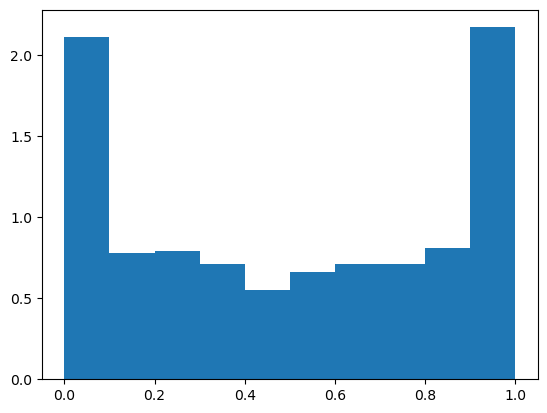

In [11]:
df_x_vals = df_beta['X'] #seperates values from index
#plot formatting
plt.hist(df_x_vals, density = True)
plt.show()

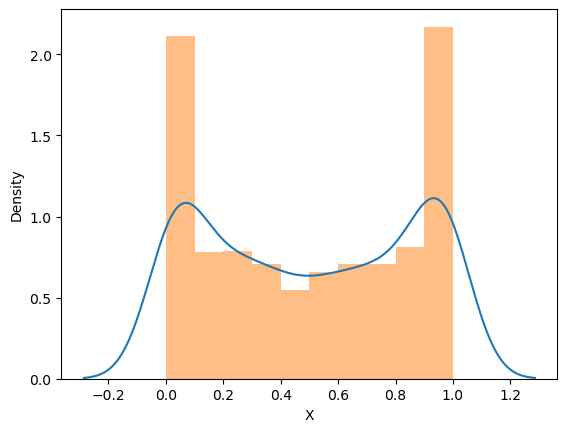

In [30]:
sns.kdeplot(df_x_vals, bw_method = 'silverman', label ='KDE plot of X') #use seaborn to generate a kde plot
plt.hist(df_x_vals, density = True, alpha = 0.5) #plots histogram against density and sets transparency to 0.5
plt.show()

In [13]:
#we now use the MOM to find estimators for alpha and beta given our df

alpha_1 = np.mean(df_x_vals)
alpha_2 = np.mean(df_x_vals**2)

#Solve equations to find parameters
#define function to use in numerical solver
def fBeta(theta):
    alpha = theta[0]
    beta = theta[1]
    #calculate differences between sample moments and actual moments
    x1 = alpha_1 - alpha/(alpha+beta)
    x2 = alpha_2 - alpha*(alpha+1)/((alpha+beta+1)*(alpha+beta))
    diffs = np.array([x1,x2])
    return diffs

#Set starting values
start = np.array([1,1])
MOME = op.fsolve(fBeta,start,xtol=0.000001)
print("Alpha =", MOME[0],"Beta =", MOME[1])

Alpha = 0.4817046402887623 Beta = 0.47829326317211174


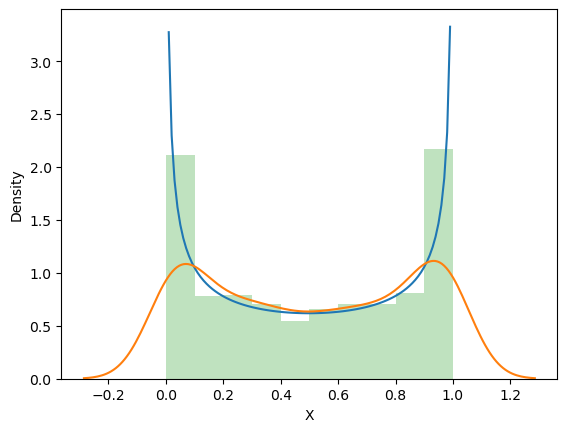

In [25]:
#Plotting a beta PDF with the MOME parameters to compare with our histogram and KDE plot
x_ax =  np.linspace(0, 1.0, 100)
beta_pdf = beta.pdf(x_ax,MOME[0],MOME[1])
plt.plot(x_ax,beta_pdf, label = 'Beta PDF with MOME parameters')
sns.kdeplot(df_x_vals, bw_method = 'silverman', label = 'KDE plot of X')
plt.hist(df_x_vals, density = True, alpha = 0.3)
plt.show()

We see that the beta PDF with MOME generated from the CSV looks very similar to the histogram and KDE generated from the CSV. This suggest that the data in the CSV was distributed with by a Beta distribution.